# Gráficos

Vamos manos a la obra. En las secciones anteriores vimos algunas de las precauciones que debemos tener en cuenta antes o durante la creación de visualizaciones. Ahora, vamos a hacer algunas. Para ello, nos vamos a apoyar en dos librerías de Python: `matplotlib` y `plotly`.

Vamos a aprovechar los datos que ya procesamos en la sección [Bases para la visualización de datos](./S4P2-claves-visualizacion.md)

In [1]:
import pandas as pd
ruta_datos = '../data/covid_clean.csv'
datos_covid = pd.read_csv(ruta_datos)
datos_covid['decesos'] = datos_covid['fecha_def'].apply(lambda x: 1 if pd.notnull(x) else 0)
muertes_diarias = datos_covid.groupby('fecha_def')['decesos'].sum().reset_index(name='fallecidos_diarios')

## `matplotlib`

`matplotlib` es una librería de Python que nos permite crear visualizaciones de datos. Es una de las librerías más populares para este propósito. En esta sección vamos a ver cómo crear algunos gráficos con esta librería.

### Gráfico de barras

Vamos a crear un gráfico de barras que nos permita comparar la cantidad de fallecidos diarios en México durante el primer semestre de 2022.

In [2]:
import matplotlib.pyplot as plt

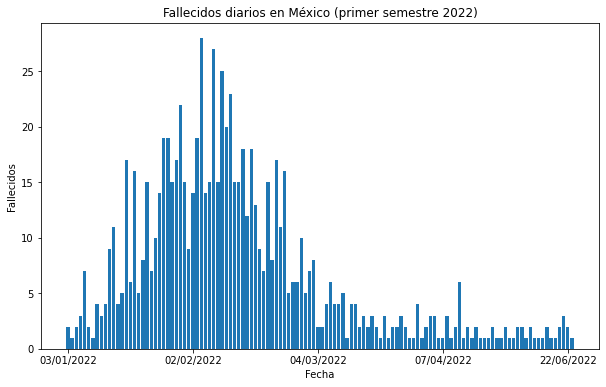

In [3]:
# retomamos el dataframe que creamos en la sección anterior `muertes_diarias`
muertes_diarias['fecha_def'] = pd.to_datetime(muertes_diarias['fecha_def'])
# este paso **no es necesario**, pero nos servirá para hacer más legible las fechas
# básicamente, pasamos de un formato de fecha a una etiqueta de contenga el
# día, mes y año
muertes_diarias['fecha_def'] = muertes_diarias['fecha_def'].dt.strftime('%d/%m/%Y')

# creamos el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(muertes_diarias['fecha_def'], muertes_diarias['fallecidos_diarios'])
ax.set_title('Fallecidos diarios en México (primer semestre 2022)')
ax.set_xlabel('Fecha')
ax.set_ylabel('Fallecidos')
# segmentamos las fechas para que no se solapen
ax.set_xticks(muertes_diarias.index[::30])

# mostramos el gráfico
plt.show()

Vamos a explicar este código con más detalle:

- Primero, importamos la librería `matplotlib.pyplot` y la renombramos como `plt`. Esta librería es la que nos permite crear visualizaciones con `matplotlib`.

In [4]:
import matplotlib.pyplot as plt

- Luego, creamos el gráfico. Para ello, usamos la función `plt.subplots`. Esta función nos permite crear una figura y un eje. La figura es el lienzo donde se dibujará el gráfico. El eje es el objeto que nos permite manipular el gráfico. En este caso, creamos una figura de 10x6 pixeles.

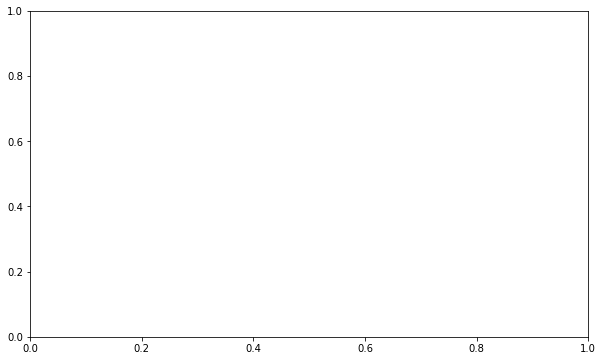

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))

- Luego, usamos el método `bar` del eje para crear el gráfico de barras. Este método recibe dos argumentos: el eje x y el eje y. En este caso, usamos la columna `fecha_def` como eje x y la columna `fallecidos_diarios` como eje y.

In [6]:
ax.bar(muertes_diarias['fecha_def'], muertes_diarias['fallecidos_diarios'])

<BarContainer object of 122 artists>

- Luego, usamos los métodos `set_title`, `set_xlabel` y `set_ylabel` para agregar títulos y etiquetas a los ejes.

In [7]:
ax.set_title('Fallecidos diarios en México (primer semestre 2022)')
ax.set_xlabel('Fecha')
ax.set_ylabel('Fallecidos')

Text(3.200000000000003, 0.5, 'Fallecidos')

- Finalmente, usamos el método `set_xticks` para segmentar las fechas en el eje x. Esto nos permite que las fechas no se solapen.

In [8]:
ax.set_xticks(muertes_diarias.index[::30])

- Por último, mostramos el gráfico con el método `plt.show`.

In [9]:
plt.show()

### Gráfico de líneas

Para hacer un gráfico de líneas es básicamente el mismo proceso del gráfico de barras, únicamente que utilizamos el método `plot` en lugar de `bar`.

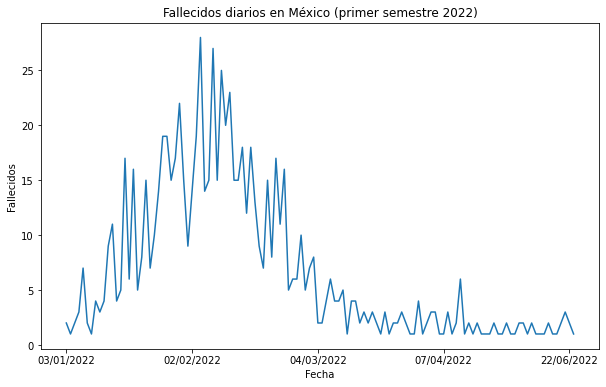

In [10]:
# creamos el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(muertes_diarias['fecha_def'], muertes_diarias['fallecidos_diarios']) # <-- aquí cambiamos `bar` por `plot`
ax.set_title('Fallecidos diarios en México (primer semestre 2022)')
ax.set_xlabel('Fecha')
ax.set_ylabel('Fallecidos')
# segmentamos las fechas para que no se solapen
ax.set_xticks(muertes_diarias.index[::30])

# mostramos el gráfico
plt.show()

Y, como mostramos en la sección [sobre el mensaje en la visualización de datos](./S4P4-visualizacion-malformada.md), podemos suavizar las líneas para que se vean más agradables. En este caso, usamos la media móvil simple de 7 días.

In [11]:
# encontrando la media hacemos el suavizado
muertes_diarias['fallecidos_diarios_smooth'] = muertes_diarias['fallecidos_diarios'].rolling(7).mean()
muertes_diarias[7:].head()

,fecha_def,fallecidos_diarios,fallecidos_diarios_smooth
7,10/01/2022,4,2.857143
8,11/01/2022,3,3.142857
9,12/01/2022,4,3.428571
10,13/01/2022,9,4.285714
11,14/01/2022,11,4.857143


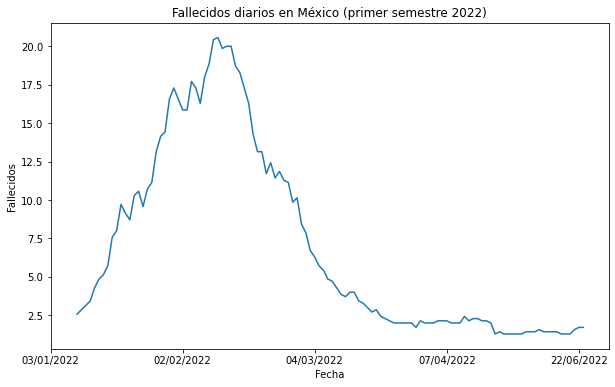

In [12]:
# creamos el gráfico
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(muertes_diarias['fecha_def'], muertes_diarias['fallecidos_diarios_smooth']) # <-- aquí cambiamos `bar` por `plot`
ax.set_title('Fallecidos diarios en México (primer semestre 2022)')
ax.set_xlabel('Fecha')
ax.set_ylabel('Fallecidos')
# segmentamos las fechas para que no se solapen
ax.set_xticks(muertes_diarias.index[::30])

# mostramos el gráfico
plt.show()

### Gráfico de dispersión

Para hacer un gráfico de dispersión es básicamente el mismo proceso del gráfico de barras, únicamente que utilizamos el método `scatter` en lugar de `bar`.

No obstante, este método no es útil para utilizarlo con los datos que usamos en los ejemplos previos. En este caso, necesitamos hallar dos variables que podamos correlacionar, así sea débilmente. En este caso, veremos si existe alguna correlación entre el sexo y la edad de las personas que se contagiaron.

In [13]:
casos_edad_sexo = datos_covid.groupby(['edad', 'sexo']).size().reset_index(name='count')
casos_edad_sexo.corr()

,edad,count
edad,1.000000,-0.572095
count,-0.572095,1.000000


Anticipamos que es una correlación lineal débil [^footnote]. Ahora, veámosla en un gráfico de dispersión.

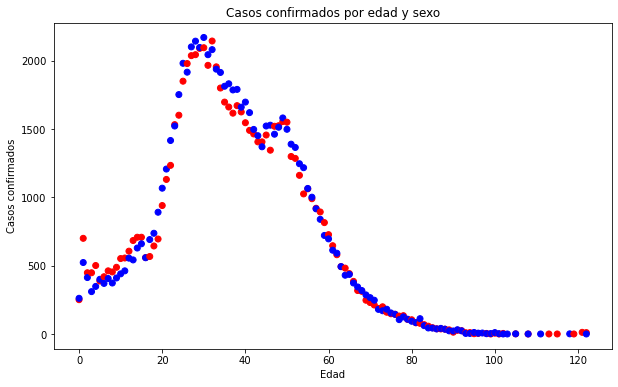

In [14]:
# creamos el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# color de los puntos por cateogoría 'sexo'
colors = {'HOMBRE': 'red', 'MUJER': 'blue'}

ax.scatter(casos_edad_sexo['edad'], casos_edad_sexo['count'], c=casos_edad_sexo['sexo'].apply(lambda x: colors[x])) 
ax.set_title('Casos confirmados por edad y sexo')
ax.set_xlabel('Edad')
ax.set_ylabel('Casos confirmados')

# mostramos el gráfico
plt.show()

Notarás que los contagios para mujeres y hombres son muy similares, por lo que comparten la misma tendencia. Es claro que no hay una correlación ya que entre mayor o menor edad no aumenta o disminuye el número de contagios. Lo que sí se observa es una tendencia, tanto en hombre o mujeres, de sufrir contagios principalmente entre los 20 y los 50 años. ¿Sucede lo mismo con los fallecimientos? Es lógico considerar que debe existir una fuerte correlación entre la edad y el número de fallecimientos, pero veamoslo.

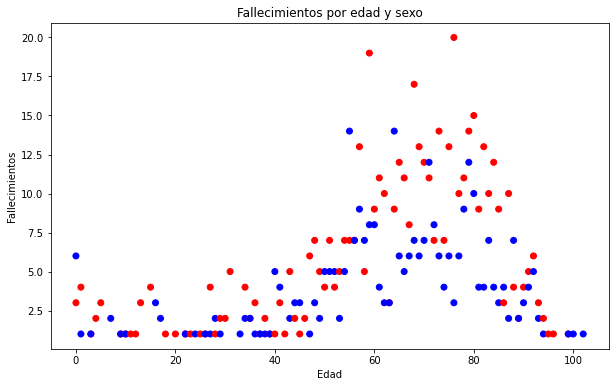

In [15]:
# seleccionamos los casos en los que hubo fallecimientos
casos_edad_sexo_muertes = datos_covid.loc[datos_covid['fecha_def'].notnull(), ['edad', 'sexo', 'fecha_def']]

# agrupamos por edad y sexo
casos_edad_sexo_muertes = casos_edad_sexo_muertes.groupby(['edad', 'sexo']).size().reset_index(name='count')

# creamos el gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# color de los puntos por cateogoría 'sexo'
colors = {'HOMBRE': 'red', 'MUJER': 'blue'}

ax.scatter(casos_edad_sexo_muertes['edad'], casos_edad_sexo_muertes['count'], c=casos_edad_sexo_muertes['sexo'].apply(lambda x: colors[x]))
ax.set_title('Fallecimientos por edad y sexo')
ax.set_xlabel('Edad')
ax.set_ylabel('Fallecimientos')

# mostramos el gráfico
plt.show()

Notas que el gráfico es más disperso y que es más complicado cer una tendencia. Esto se debe en parte a que los contagios son mucho mayores que las defunciones, lo que hacer que la dispersión sea mayor. Por otra parte, con los datos que tenemos, es posible encontrar una correlación lineal positiva aunque débil entre la edad y el número de fallecimientos.

In [16]:
casos_edad_sexo_muertes.corr()

,edad,count
edad,1.000000,0.400549
count,0.400549,1.000000


Como vemos en la gráfica, hay una ligera tendencia a que entre mayor sea la edad, mayor sean los fallecimientos.

Pero, ¿qué pasa con otros padecimientos? ¿existe alguna relación entre la edad, la enfermedad y el número de fallecimientos? Afortunadamente no hemos eliminado ni modificado nuestro archivo original, así que podemos regresar a él y hacer un análisis similar.

In [17]:
datos_nacionales = '../data/casos_nacionales_covid-19_2022_semestre1.csv'
covid_nacional = pd.read_csv(datos_nacionales, encoding='utf-8')

/Users/jairoantonio/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [18]:
lista_enfermedades = ['diabetes', 'epoc', 'asma', 'inmusupr', 'hipertension',  'cardiovascular', 'obesidad', 'renal_cronica', 'tabaquismo']

for l in lista_enfermedades:
    casos_edad_sexo_muertes = covid_nacional.loc[covid_nacional['fecha_def'].notnull(), ['edad', l, 'fecha_def']]
    casos_edad_sexo_muertes = casos_edad_sexo_muertes.groupby(['edad', l]).size().reset_index(name='count')
    correla = casos_edad_sexo_muertes.loc[casos_edad_sexo_muertes[l] == 'SI'].corr()
    print(l, correla)

diabetes            edad     count
edad   1.000000  0.306907
count  0.306907  1.000000
epoc            edad     count
edad   1.000000  0.364565
count  0.364565  1.000000
asma            edad     count
edad   1.000000  0.195403
count  0.195403  1.000000


inmusupr            edad     count
edad   1.000000  0.323069
count  0.323069  1.000000
hipertension            edad     count
edad   1.000000  0.423814
count  0.423814  1.000000
cardiovascular            edad     count
edad   1.000000  0.438819
count  0.438819  1.000000


obesidad            edad     count
edad   1.000000  0.255072
count  0.255072  1.000000
renal_cronica            edad     count
edad   1.000000  0.379559
count  0.379559  1.000000
tabaquismo            edad     count
edad   1.000000  0.403027
count  0.403027  1.000000


Como verás, las correlaciones lineales en todos los casos son muy débiles. Podemos graficar una de las tendencias más claras, la relacionada con la enfermedad cardiovascular y observar el gráfico:

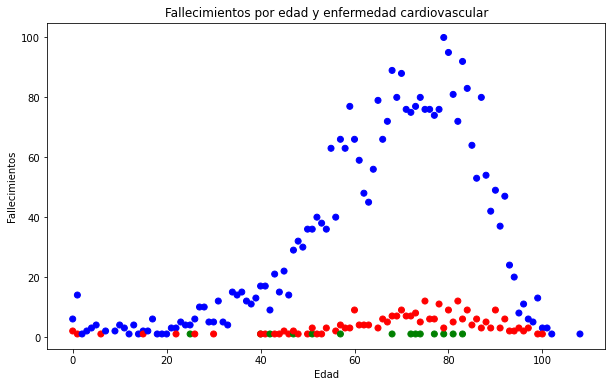

In [19]:
casos_edad_sexo_muertes = covid_nacional.loc[covid_nacional['fecha_def'].notnull(), ['edad', 'cardiovascular', 'fecha_def']]
casos_edad_sexo_muertes = casos_edad_sexo_muertes.groupby(['edad', 'cardiovascular']).size().reset_index(name='count')

fig, ax = plt.subplots(figsize=(10, 6))

colors = {'SI': 'red', 'NO': 'blue', 'SE IGNORA': 'green'}

ax.scatter(casos_edad_sexo_muertes['edad'], casos_edad_sexo_muertes['count'], c=casos_edad_sexo_muertes['cardiovascular'].apply(lambda x: colors[x]))
ax.set_title('Fallecimientos por edad y enfermedad cardiovascular')
ax.set_xlabel('Edad')
ax.set_ylabel('Fallecimientos')

plt.show()

¡Fantástico! Hemos experimentado con varios tipos de gráficas, intentando encontrar patrones en nuestros datos. Hallamos algunas tendencias, como que durante el segundo semetre de 2020 hubo un pico de mortalidad en el mes de febrero, aunque sin alcanzar a superar los 3o fallecimientos diarios. Por otra parte, los contagios se centraron en las poblaciones con edades entre 20 y 40 años, mientras que los fallecimientos se concentraron en las personas mayores de 60 años. Por último, no encontramos una relación entre las enfermedades y el número de fallecimientos.

Obviamente todavía podríamos realizar otras operaciones y gráficos, pero pasemos al siguiente tema, donde realizaremos las mismas gráficas pero con la ayuda de la librería Plotly, lo que dará un poco más de dinamismo a nuestras visualizaciones.

## Notas

[^footnote]: En aras de la brevedad, en esta sección trataremos correlaciones lineales basados en el coeficiente de correlación de Pearson. Si quisiéramos profundizar más en la distribución de los datos, tendríamos que utilizar otro tipo de coeficientes no-lineales, como el coeficiente de correlación de Spearman o el coeficiente de correlación de Kendall. Si quieres realizar estos análisis con tus datos con Python, puedes explotar la librearía [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).